In [26]:
import numpy as np
import pandas as pd

In [27]:
data = pd.read_csv(r"dataset/iris.arff.csv", header=0)
# data.drop(["Id"], axis=1, inplace=True)  # 去掉无关特征
data.drop_duplicates(inplace=True)  # 去除重复元素

# data["class"].drop_duplicates()
# Iris-setosa Iris-versicolor Iris-virginica

# 名称映射为数字
data["class"] = data["class"].map({"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2})
# 筛选数据，只选择0和1
data = data[data["class"]!=2]
data

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [28]:
class LogisticRegression:
    '''逻辑回归算法实现'''
    def __init__(self, learning_rate, times):
        '''初始化
        parameters
        -----
        learning_rate: float 学习率
        times: int 迭代次数
        '''
        self.learning_rate = learning_rate
        self.times = times
        
    def sigmoid(self, z):
        ''' sigmoid实现
        -----
        z: float  自变量： z=w.T*x + b
        -----
        因变量 p: float, 属于[0,1]区间。p>=0.5(z>0)时，类别为1，否则为0
        '''
        return 1.0 / ( 1.0 + np.exp(-z) )    
    def fit(self, X, y):
        '''
        训练
        Parameters:
        X: 特征矩阵，可以是List也可以是Ndarray，形状为： [样本数量,特征数量]
        y: 标签数组
        '''
        X = np.asarray(X)  # 和np.array差不多，但是要高级一些
        y = np.asarray(y)
        # 创建权重向量，初始化为0. 长度多加的1是截距
        self.w_ = np.zeros(1 + X.shape[1]) # shape[0]为样本数量，shape[1]为特征数量
        # 创建损失列表，保存每次迭代后的损失值
        self.loss_ = []
        for i in range(self.times):
            z = np.dot(X, self.w_[1:]) + self.w_[0]
            # 计算概率值(判定为1的概率值)
            p = self.sigmoid(z)
            # 根据逻辑回归的代价函数（目标函数或叫损失函数）计算损失值
            # 逻辑回归的代价函数（目标函数或叫损失函数）：
            # J(W) = - sum(yi * log(sigmoid(zi))+(1-yi)log(1-sigmoid(zi)))  
            cost = - np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))  
            self.loss_.append(cost)
            # *******************重点：权重更新********************
            # 调整权重值，根据公式 权重(j列) = 权重(j列) + 学习率 * sum( y - s(z)) * x(j列)
            self.w_[0] += self.learning_rate * np.sum(y - p) * 1
            self.w_[1:] += self.learning_rate * np.dot(X.T, y - p)
    def predict_proba(self, X):
        '''根据参数传递的样本，对样本数据进行预测属于某一个类别的概率
        
        Parameters
        -----
        X: 类数组类型 [ 样本数量, 特征数量]
        
        Return
        -----
        result：预测（概率值）
        '''
        X = np.asarray(X)
        z = np.dot(X, self.w_[1:]) + self.w_[0]
        p = self.sigmoid(z)
        # 将预测结果转换为二位数组，方便后续拼接
        p = p.reshape(-1,1)
        # 将两个数组拼接，方向是横向拼接
        return np.concatenate([1-p, p], axis=1) #横向拼接为为1
    def predict(self, X):
        '''预测样本属于哪个类别
        
        Parameters
        -----
        X: 类数组类型： [样本数量，特征数量]. 带预测样本特征
        
        Return
        -----
        返回属于哪个类别
        '''
        return np.argmax(self.predict_proba(X), axis=1)  # 返回值较大的那个为类别

In [29]:
t1 = data[data["class"]==0]
t2 = data[data["class"]==1]
t1 = t1.sample(len(t1), random_state=0)
t2 = t2.sample(len(t2), random_state=0)
train_X = pd.concat([t1.iloc[:40,:-1], t2.iloc[:40,:-1]], axis=0)
train_y = pd.concat([t1.iloc[:40,-1], t2.iloc[:40,-1]], axis=0)
test_X = pd.concat([t1.iloc[40:,:-1], t2.iloc[40:,:-1]], axis=0)
test_y = pd.concat([t1.iloc[40:,-1], t2.iloc[40:,-1]], axis=0)

# 鸢尾花的特征列都在同一个数量级，我们可以不用标准化处理
lr = LogisticRegression(learning_rate=0.01, times=20)
lr.fit(train_X, train_y)
# lr.predict_proba(test_X)
result = lr.predict(test_X)
# 计算准确性
accuracy = np.sum(result==test_y) / len(test_y)
display(accuracy)

1.0

In [30]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'SimHei'
mpl.rcParams['axes.unicode_minus'] = False

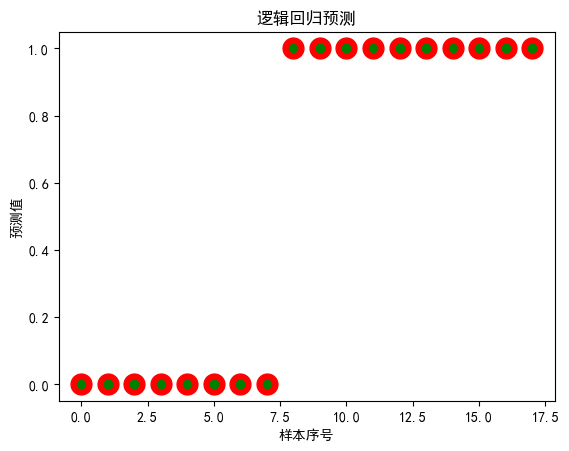

In [33]:
# 绘制预测值
plt.plot(result, 'ro',ms=15, label="真实值") # ms指定圆圈大小
plt.plot(test_y.values, 'go', label="预测值") # pandas读取时serise类型，我们需要转为ndarray
plt.title('逻辑回归预测')
plt.xlabel('样本序号')
plt.ylabel('预测值')
plt.show()


Text(0, 0.5, '损失值loss')

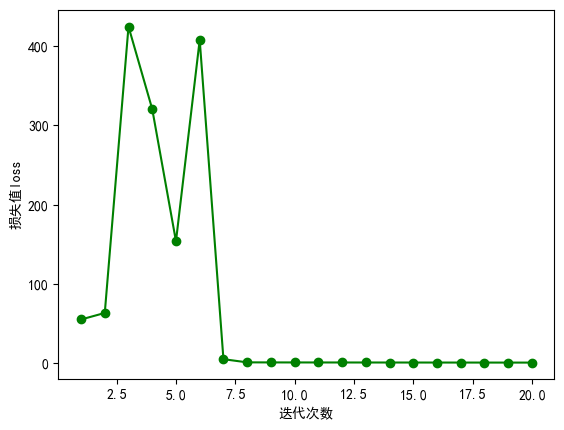

In [32]:
# 绘制目标函数的损失值
plt.plot(range(1,lr.times+1), lr.loss_, 'go-')
plt.xlabel('迭代次数')
plt.ylabel('损失值loss')